<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/(NaN_Dropped)SA_Correlations_Food_Availability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#importing libraries 
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [13]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_dfi = pd.read_csv(data_path, encoding ='latin-1')
del general_dfi['Non-Cereal Food Aid (Grain Equiv. 1000MT)']
del general_dfi['Cereal Food Aid (Grain Equiv. 1000MT)']
del general_dfi['Total Food Aid']
del general_dfi['Total Food Aid per capita (kg/cap/year)']
general_df = general_dfi.dropna()
general_df = general_df.reset_index(drop=True)
general_df

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Region
0,Algeria,1980,206.507152,2567.776695,3413.810,0.0,42.426748,0.000000,18.811,3456.236748,0.000000,136.503997,183.734876,0.000000,320.238873,North Africa
1,Algeria,1981,197.960152,1965.774252,2719.260,0.0,32.420636,0.000000,19.442,2751.680636,0.000000,101.109672,141.532797,0.000000,242.642469,North Africa
2,Algeria,1982,196.535700,1629.625445,4094.760,0.0,55.711064,0.000000,20.096,4150.471064,0.000000,81.092031,206.532199,0.000000,287.624229,North Africa
3,Algeria,1983,196.798051,1414.955573,3766.460,0.0,90.644673,0.308102,20.763,3857.104673,0.308102,68.147935,185.768178,0.014839,253.901274,North Africa
4,Algeria,1984,191.743128,1594.689654,4115.570,0.0,65.202708,0.000000,21.433,4180.772708,0.000000,74.403474,195.062413,0.000000,269.465887,North Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,Zimbabwe,2008,153.700079,932.603468,1007.425,0.0,0.545611,0.004930,12.452,1007.970611,0.004930,74.895878,80.948491,0.000396,155.843973,Southern Africa
2283,Zimbabwe,2009,141.317483,1677.731196,576.300,0.0,2.163975,0.014400,12.474,578.463975,0.014400,134.498252,46.373575,0.001154,180.870673,Southern Africa
2284,Zimbabwe,2010,136.990970,1723.572567,368.600,0.0,2.163975,0.014400,12.571,370.763975,0.014400,137.107037,29.493594,0.001145,166.599486,Southern Africa
2285,Zimbabwe,2011,139.933312,1765.470308,640.000,0.0,2.163975,0.014400,12.754,642.163975,0.014400,138.424832,50.350006,0.001129,188.773709,Southern Africa


In [14]:
#creating a function to create scatter plots for each country showing the relationship between two variables  
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #adding a linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  #calculating the slope and y-intercept values 
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr

Zimbabwe
0.0776195995990306
148.01562374414934
0.23173385088083687
Zambia
0.16549642286884403
136.82017140118174
0.110055992008289
Swaziland
0.03394188844982662
161.5764471176686
0.01722729497566938
Namibia
0.06018386215110293
156.35339675212958
0.009484919584822556
Mozambique
0.6339056519062509
68.00430553021464
0.808592023607283
Malawi
0.1839919132625384
141.21912131717292
0.6899446461874815
Madagascar
0.26281232771772844
126.51524431149092
0.38373036158081264
Lesotho
0.41179765944192626
144.46004724108997
0.43064798066685905


,Production Quantity per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year),1.000000,0.656238
Food Availibility per capita (kg/cap/year),0.656238,1.000000


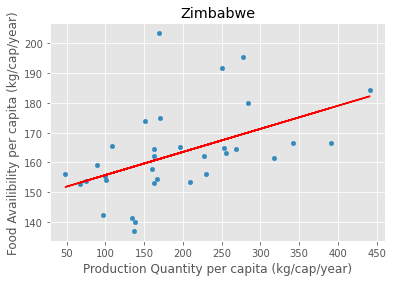

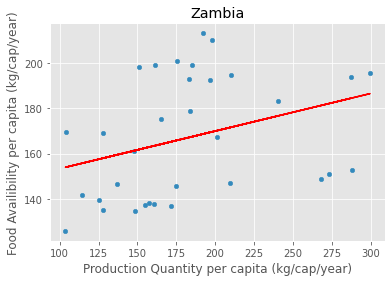

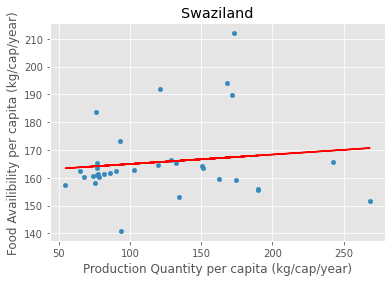

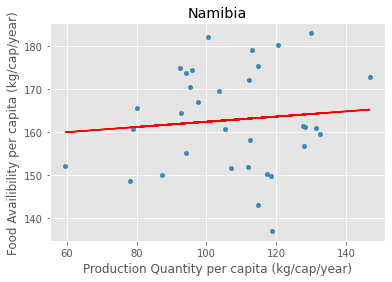

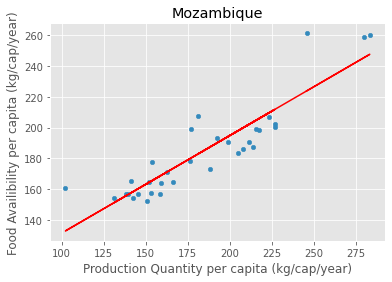

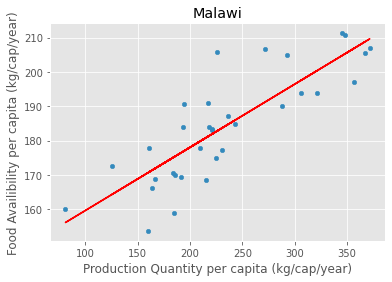

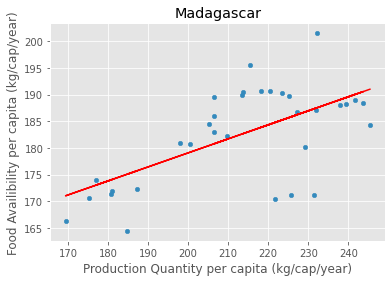

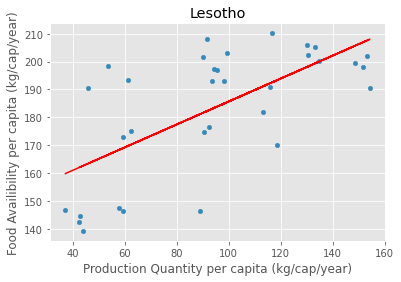

In [15]:
#calling the function for every country in Southern Africa, choosing food production per capita and food availibility per capita as the arguments
#this allows us to explore the relationship between food production per capita and food availability per capita 
plot_country('Zimbabwe','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Production Quantity per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [16]:
#calculating the correlation coefficient between production per capita and food availability per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Food Availibility per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                    0.481387
Food Availibility per capita (kg/cap/year)                                        0.481387                                    1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                    0.331747
Food Availibility per capita (kg/cap/year)                                        0.331747                                    1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Production Quantity per capit

Zimbabwe
-0.10228649316659118
166.78069007660017
0.06373844015983716
Zambia
0.3741999396667763
156.87682188514745
0.10321621344370527
Swaziland
-0.0011664995203350137
165.82208613130067
4.97165977794542e-06
Namibia
0.2815870966970698
140.38780062252044
0.23250888637567743
Mozambique
0.3044867466110458
173.68654459844828
0.012357707936008301
Malawi
-0.2846839284737968
188.7260487303638
0.06151076601781362
Madagascar
-0.37223639525946645
188.75342311174194
0.09533074590600116
Lesotho
-0.1289986193571679
196.1063167264373
0.0190254407688876


,Imports (all) per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year),1.000000,-0.137933
Food Availibility per capita (kg/cap/year),-0.137933,1.000000


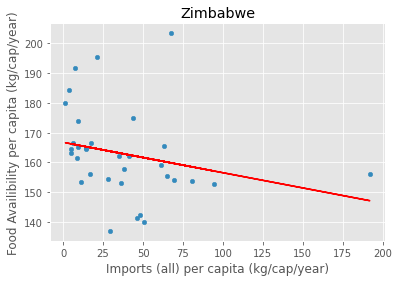

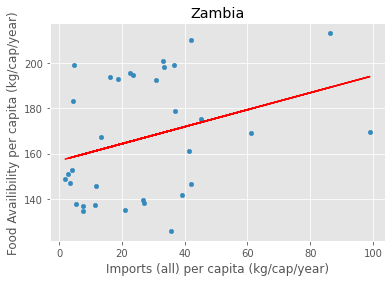

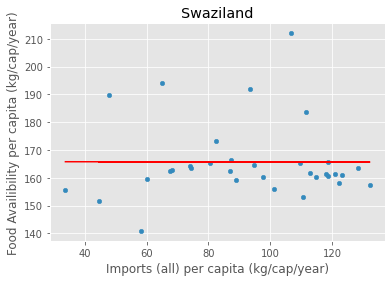

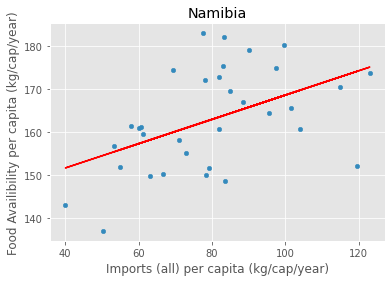

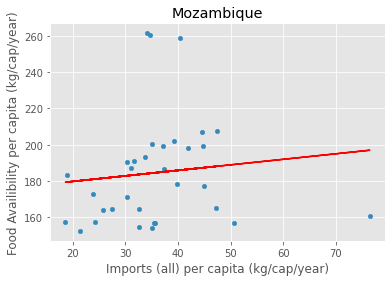

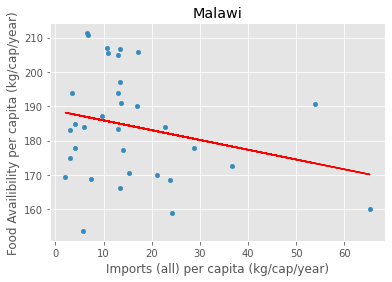

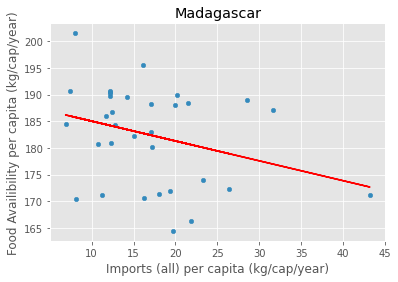

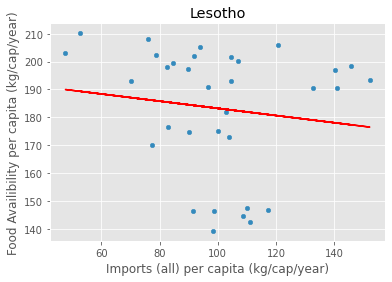

In [17]:
#calling the function for every country in Southern Africa, choosing food imports per capita and food availibility per capita as the arguments
#this allows us to explore the relationship between food imports per capita and food availability per capita 
plot_country('Zimbabwe','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Imports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [18]:
#calculating the correlation coefficient between imports per capita and food availability per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Imports (all) per capita (kg/cap/year)'
feature2= 'Food Availibility per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                             Imports (all) per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year)                                    1.000000                                   -0.252465
Food Availibility per capita (kg/cap/year)                               -0.252465                                    1.000000
Zambia                                             Imports (all) per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year)                                    1.000000                                    0.321273
Food Availibility per capita (kg/cap/year)                                0.321273                                    1.000000
Swaziland                                             Imports (all) per capita (kg/cap/year)  Food Availibility per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year)                                     1.00000   

Zimbabwe
0.35672812498591433
157.64822264508342
0.20093358961055993
Zambia
-0.5889636634178808
172.24224337590235
0.08421729040462146
Swaziland
1.9679824127982415
159.92235085980082
0.2739365857059516
Namibia
0.21708654081254386
161.93284123693695
0.01661130677773682
Mozambique
5.520451640870683
168.52490303506306
0.4071040144549516
Malawi
0.6262257893617938
180.0857194949768
0.13163813707176397
Madagascar
2.2852916292983445
180.74058027056958
0.053092002141326006
Lesotho
3.4384853112579252
178.69003314734215
0.16946782863687393


,Exports (all) per capita (kg/cap/year),Food Availibility per capita (kg/cap/year)
Exports (all) per capita (kg/cap/year),1.000000,0.411665
Food Availibility per capita (kg/cap/year),0.411665,1.000000


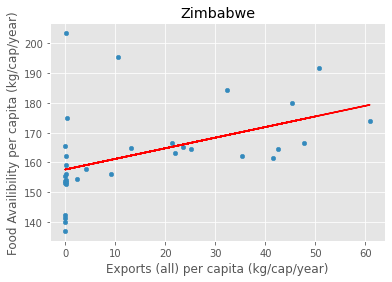

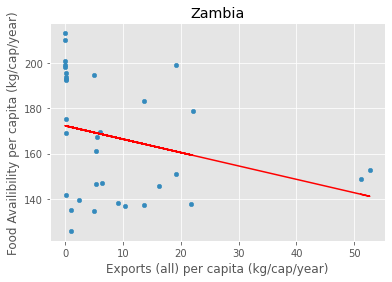

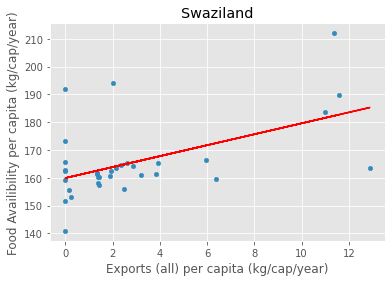

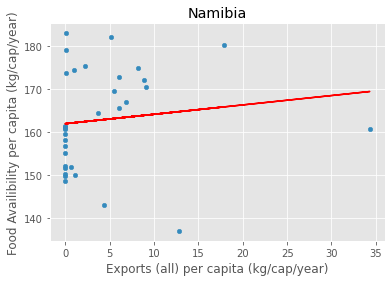

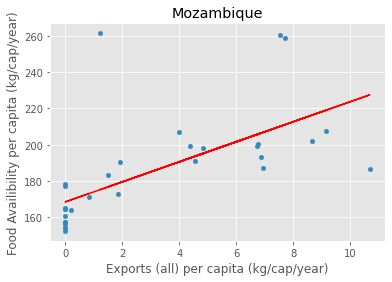

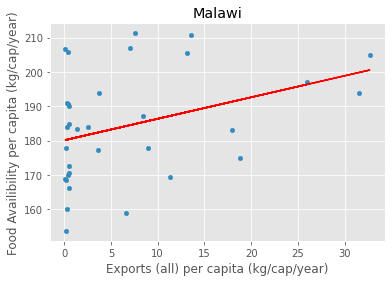

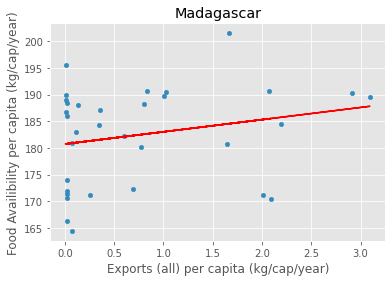

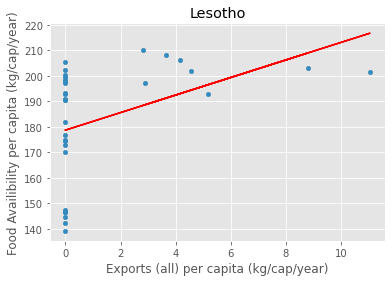

In [19]:
#calling the function for every country in Southern Africa, choosing food exports per capita and food availibility availability as the arguments
#this allows us to explore the relationship between food production per capita and food availability per capita 
plot_country('Zimbabwe','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Zambia','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Swaziland','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Namibia','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Mozambique','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Malawi','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Madagascar','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')
plot_country('Lesotho','Exports (all) per capita (kg/cap/year)','Food Availibility per capita (kg/cap/year)')

In [20]:
#correlation coefficient - availability and export (all) 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Food Availibility per capita (kg/cap/year)'
feature2= 'Exports (all) per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                    1.000000                                0.448256
Exports (all) per capita (kg/cap/year)                                        0.448256                                1.000000
Zambia                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                    1.000000                               -0.290202
Exports (all) per capita (kg/cap/year)                                       -0.290202                                1.000000
Swaziland                                             Food Availibility per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Food Availibility per capita (kg/cap/year)                                     1.0000